In [2]:
# Pré-iGEM UFC
## Minicurso de Programação e Modelagem em Biologia 1/2016.1
#### Renato Marques de Oliveira

## Parte 1 - Programação

### Exemplo 1
O código a seguir inicia nosso script para a aula. Ele carrega os pacotes que iremos utilizar.
Antes de mais nada, carregamos o pacote de funções matemáticas **Numpy** e o pacote de criação de gráficos 
**Matplotlib**, que é distribuído sob o nome de "pylab". 

A primeira linha `%matplotlib inline` foi inserida para ativar a compatibilidade entre este *notebook* e o módulo Matplotlib, visto que o Jupyter Notebook é um ambiente de Python especial.

In [3]:
%matplotlib inline
import numpy as np
import pylab as py

In [4]:
v1 = np.array([3,2,1])
v1

array([3, 2, 1])

In [5]:
v1.sort()
v1

array([1, 2, 3])

In [6]:
v2 = np.empty([2,2])
v2

array([[  1.57824140e-311,   0.00000000e+000],
       [  6.83067075e-315,   1.57822601e-311]])

### Exemplo 2

In [7]:
class Complex:
    def __init__(x, realpart, imagpart): # este "x" só pertence ao escopo deste bloco de definição de classe
        x.r = realpart
        x.i = imagpart
        
x = Complex(2,1) # este "x" é diferente do x utilizado na definição de classe acima
x.i,x.r

(1, 2)

### Exemplo 3
 `def f(x,c)` é a sintaxe de declaração de uma função chamada
 `f` que recebe `x` e `c` como argumentos. Os dois pontos `:` denotam que há um
 bloco de comandos a partir da linha seguinte, pertencente à
 função `f`. Neste caso, o bloco é formado por apenas um comando:
 retorne o valor de `x**2 + c`, lembrando que `x**2` é a sintaxe do
 Python para a função quadrado. 

In [8]:
def f(x,c):
    return x**2 + c 

x = np.linspace(-2,2,30)
x

array([-2.        , -1.86206897, -1.72413793, -1.5862069 , -1.44827586,
       -1.31034483, -1.17241379, -1.03448276, -0.89655172, -0.75862069,
       -0.62068966, -0.48275862, -0.34482759, -0.20689655, -0.06896552,
        0.06896552,  0.20689655,  0.34482759,  0.48275862,  0.62068966,
        0.75862069,  0.89655172,  1.03448276,  1.17241379,  1.31034483,
        1.44827586,  1.5862069 ,  1.72413793,  1.86206897,  2.        ])

A função `linspace(a,b,c)` retorna um vetor de `c` elementos, iniciando em `a`, terminando em `b`, igualmente espaçados. Ela gera a sequência de valores de `x` que vamos passar à função para plotagem.

A função `plot(a,b)` plota o vetor `b` contra o vetor `a`, ambos de mesmo tamanho, na forma de pontos ${(a_1,b_1),...,(a_n,b_n)}$ se `a = [a1,...,an]` e `b = [b1,...,bn]`. O comando`f(x,.5)` gera um vetor de 30 elementos que corresponde à imagem do vetor `x` sob a função `f`.

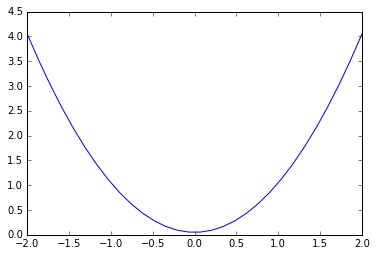

In [9]:
p1 = py.plot(x, f(x,.05))
#p2 = py.plot([0,2],[0,2])
#show()
# experimente apagar a porção "p1 = " do código acima
# experimente descomentar a segunda linha

Normalmente o Python não mostra instantaneamente os gráficos gerados, então precisamos pedir para que eles sejam mostrados através da função **show** do módulo Matplotlib. Mas o Jupyter Notebook é configurado para exibir os gráficos da função **plot** automaticamente sem precisarmos invocar o **show**.

### Exercício 1

* http://docs.scipy.org/doc/numpy/reference/routines.array-creation.html
* http://docs.scipy.org/doc/numpy/reference/routines.random.html
* http://docs.scipy.org/doc/numpy/reference/routines.statistics.html
* http://docs.scipy.org/doc/numpy/reference/routines.math.html

In [10]:
v1 = [1,2,3]
v2 = [v1,v1]
v3 = range(10)
v1,v2,v3

([1, 2, 3], [[1, 2, 3], [1, 2, 3]], range(0, 10))

In [11]:
# exclua este comentário

### Exercício 2
#### Exemplo:

In [12]:
x = np.ones(10)
for i in x:
    if np.sin(i) > .5:
        print(i)

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [13]:
# exclua este comentário

### Exercício 3
O código usado no exemplo abaixo foi escrito com funções práticas e atalhos para facilitar a leitura e por simplicidade. Mas como você faria sem lançar mão dessas ferramentas?
#### Exemplo:

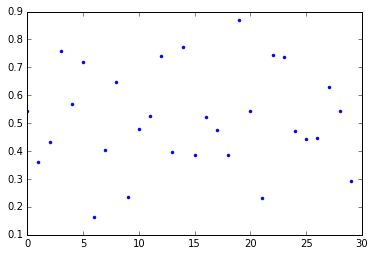

In [14]:
x = np.ones(10)

def media(vetor):
    return np.sum(vetor)/len(vetor)
    
a = np.random.rand(30,3)
#y = np.zeros(30)

y = [media(i) for i in a] #opa! Trapaça!
    
py.plot(y,'b.')

In [15]:
# exclua este comentário

## Parte 2 - Integração Numérica

### Exercício 4

Defina uma função que aplique o procedimento abaixo à uma equação diferencial da sua escolha, e que permita ao usuário decidir tanto a condição inicial $F(t_0)$ quanto o número de passos `steps`. 
$$ F(t_{n+1}) \approx F(t_n) + F'(t_n)(\Delta t) $$
#### Exemplo:
Vamos aplicar o procedimento à função $f'(t) = -f(t)^2 + 2$

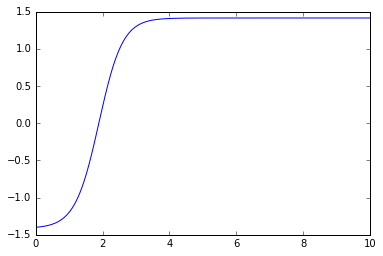

In [16]:
def Fun(f,t=0):
    return -f**2 + 2   # o que acontece se você mudar o valor da constante (2)? você consegue explicar porquê?
                       # e se você mudar o sinal do termo -x**2?
def solveF(F, F_t0, time, dt):
    steps = (int(time/dt))
    F_t = list(np.zeros(steps))
    F_t[0] = F_t0
    for t in range(1,steps):
        F_t[t] = F_t[t - 1] + F(F_t[t - 1])*dt
    return F_t

t_0 = 0
time = 10
dt = .01
F_t0 = -1.4

x_axis = np.arange(0,time,dt)
y_axis = solveF(Fun,F_t0,time,dt)
py.plot(x_axis,y_axis)

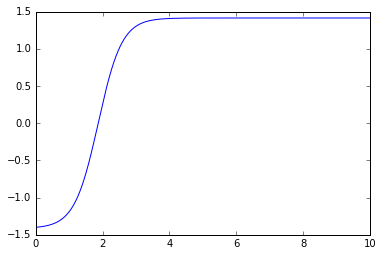

In [17]:
from scipy.integrate import odeint

t = np.arange(t_0,time,dt)
y = odeint(Fun,F_t0,t)

py.plot(t,y)

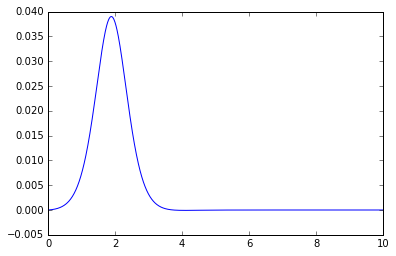

In [18]:
y_0 = solveF(Fun,F_t0,time,dt)
y_1 = odeint(Fun,F_t0,t)

py.plot(t,(y_1.T - y_0.T)[0])